In [5]:
import pandas as pd
from pandas.io import sql
%matplotlib inline

In [2]:
df = pd.read_csv('housing-data.csv')

In [4]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [6]:
import sqlite3
conn = sqlite3.connect('my_first_db_with_pandas.sqlite')

In [7]:
df.to_sql('houses_pandas',con=conn,index=False)

In [8]:
sql.read_sql('select * from houses_pandas limit 5', con=conn)

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [9]:
df.groupby('bdrms')['price'].mean()

bdrms
1    169900
2    280866
3    326403
4    377449
5    699900
Name: price, dtype: int64

In [11]:
aa = pd.DataFrame(df.groupby('bdrms')['price'].mean())

In [41]:
df.pivot_table('price','bdrms')

bdrms
1    169900
2    280866
3    326403
4    377449
5    699900
Name: price, dtype: int64

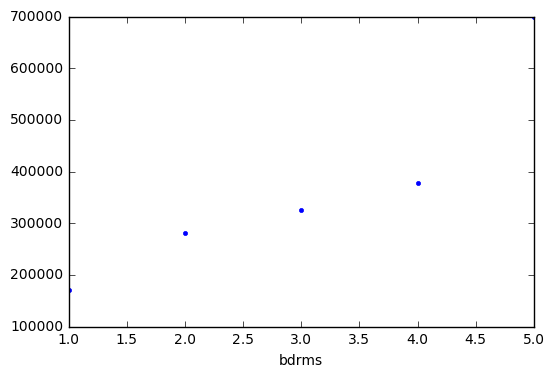

In [42]:
df.pivot_table('price','bdrms').plot(style=".")

In [48]:
sql.read_sql('select AVG(price) from houses_pandas where bdrms=1', con=conn)

,AVG(price)
0,169900.0


In [50]:
sql.read_sql('select AVG(price) from houses_pandas where bdrms=2', con=conn)

,AVG(price)
0,280866.666667


In [51]:
df.pivot_table('price','bdrms')

bdrms
1    169900
2    280866
3    326403
4    377449
5    699900
Name: price, dtype: int64

In [56]:
sql.read_sql('select bdrms, AVG(price) from houses_pandas GROUP BY bdrms', con=conn)

,bdrms,AVG(price)
0,1,169900.000000
1,2,280866.666667
2,3,326403.920000
3,4,377449.785714
4,5,699900.000000


In [ ]:
# so pandas is like SQL but much better. for example we can plot ....

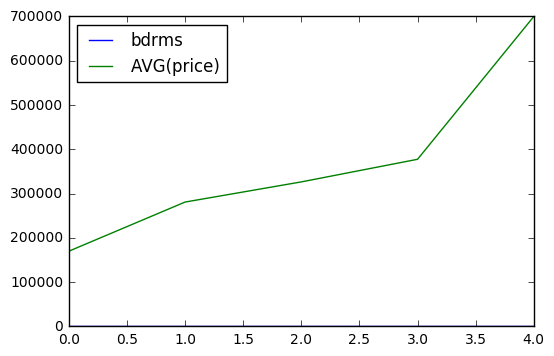

In [57]:
sql.read_sql('select bdrms, AVG(price) from houses_pandas GROUP BY bdrms', con=conn).plot()